# 1. Introduction/ Analysis of the dataset

First, we import the necassary packages and libraries

In [2]:
# import pandas librabry necassary for reading the dataset & creating the dataframes
import pandas as pd 
# import matplotlib necassary for plotting the data
import matplotlib.pyplot as plt 
# import seaborn for vizualizing the data
import seaborn as sns
# import the Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
#import the svm classifier from sklearn
from sklearn import svm
# import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# import Exhaustive search and KFold
from sklearn.model_selection import GridSearchCV, KFold
# import the Metrics calculators
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
# import the Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay

We now load and view our data

In [3]:
#loading the data
dataset = pd.read_csv('dataset_assignment1.csv')
# Display basic information about the dataset and the first few rows to understand its structure
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


View how Balanced/Un-Balanced the dataset is

In [4]:
# Print out the instance count of each class
class_distribution = dataset['class'].value_counts()
print(class_distribution)

class
0    459
1    241
Name: count, dtype: int64


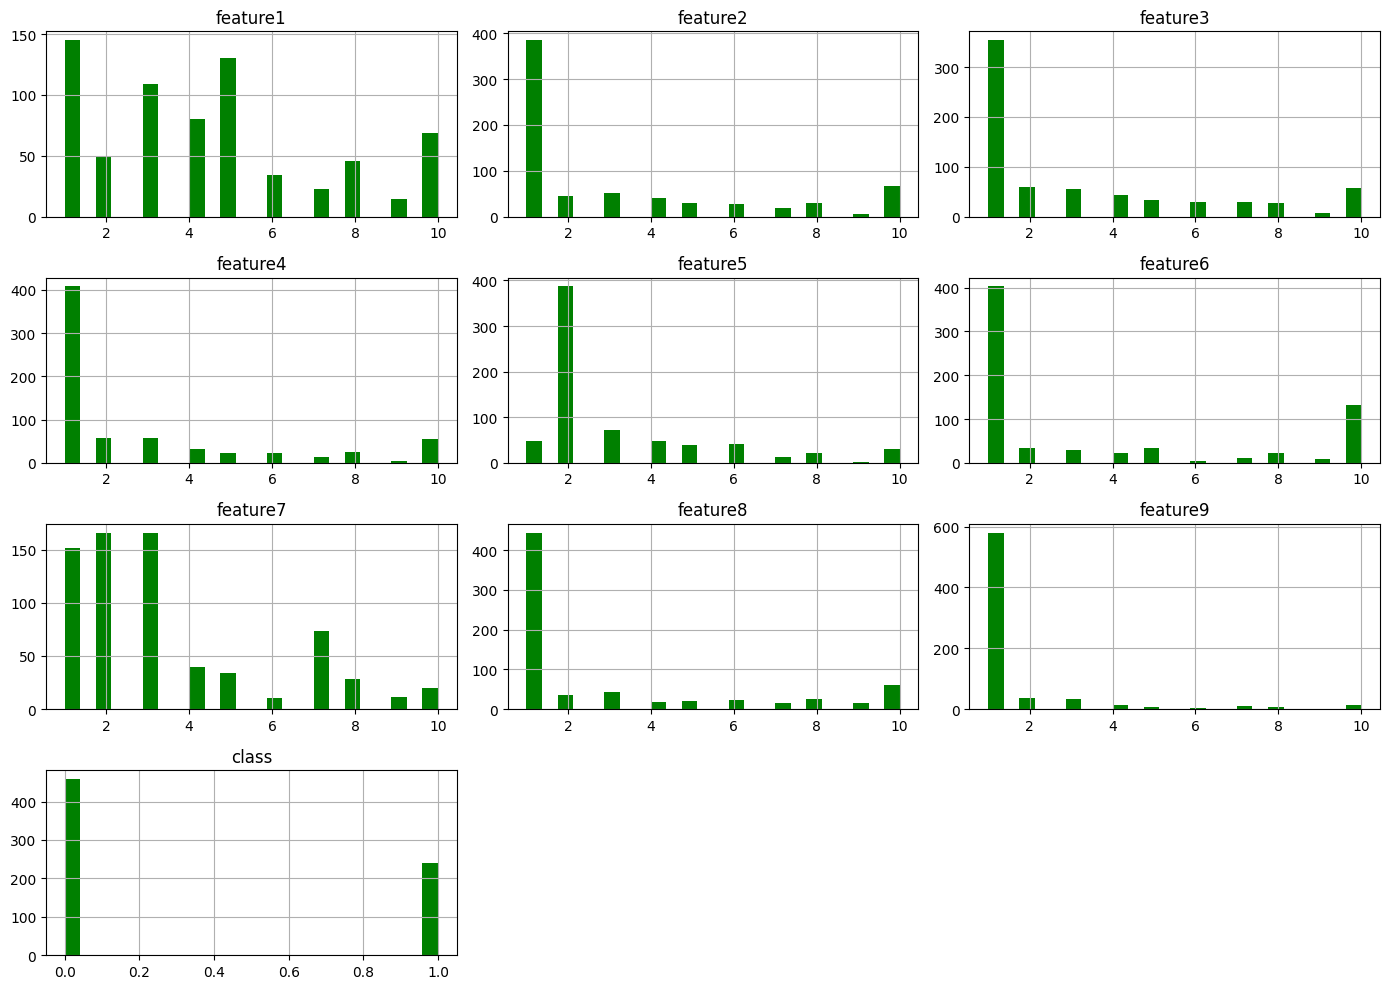

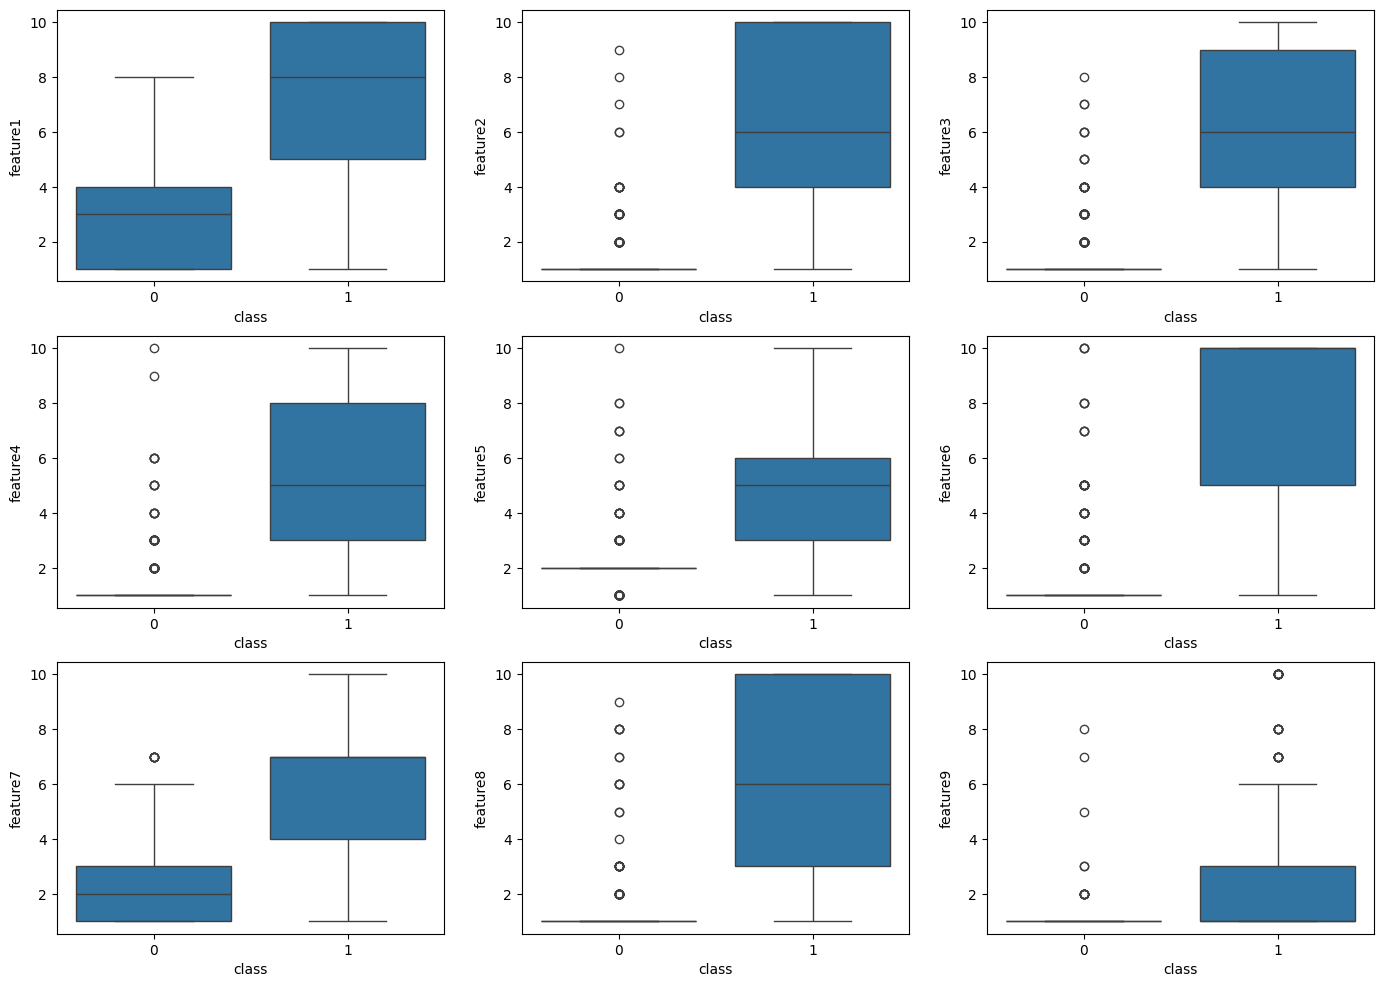

In [15]:
# Plot histograms for each feature & the class column
dataset.hist(bins=24, figsize=(14, 10),  color='green')
plt.tight_layout()
plt.show()
# Plotting box plots for each feature by class to see the data distribution and outliers
plt.figure(figsize=(17, 12))
for the_columns, data_set in enumerate(dataset.columns[:-1], start=1):
    plt.subplot(3, 3, the_columns)
    sns.boxplot(x='class', y=data_set, data=dataset)
plt.show()


Split the data into 80% training set and 20% testing set

In [5]:
#import the test split module from sklearn
from sklearn.model_selection import train_test_split
# Set the feautres and the Class variables
Y = dataset['class']
X = dataset.drop('class', axis=1)
# Split the dataset into 80% training set, 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Logistic Regression

The test function will be set and trained on the 80% of the data, that set aside for training the algorithm 

In [6]:
#implement the test function for Logistic Regression k-fold cross-validation
def test():
    # Train the model, a high maximum iteration to avoid issues
    model = LogisticRegression(max_iter=10000)
    # define the hyperparameter values for the exhaustive search
    lr_parameters = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
    }
    # Define K-Fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # Setup GridSearchCV
    lr_gridsearch = GridSearchCV(model, lr_parameters, cv=kfold, scoring='f1')
    lr_gridsearch.fit(X_train, y_train)
    # Best model after grid search
    print("Best parameters found:", lr_gridsearch.best_params_)
#Execute the test function to print the best hyperparameters for the f1 Scoring discriminator
test()

Best parameters found: {'C': 1, 'solver': 'lbfgs'}


set up the final model based on the hyperparameters output of the test function

In [7]:
def logistic_reg():
    # Name the model for the future database
    method = 'Logistic Regression'
    # Train the model with the best hyperparameter values, produced above
    model = LogisticRegression(solver='lbfgs', C=1)
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the testing set
    lr_y_pred = model.predict(X_test)
    # Calculate the Evaluation metrics
    accuracy = accuracy_score(y_test, lr_y_pred)
    precision = precision_score(y_test, lr_y_pred)
    recall = recall_score(y_test, lr_y_pred)
    f1 = f1_score(y_test, lr_y_pred)
    # AUC Score prediction
    LR_predictions_proba = model.predict_proba(X_test)[::, 1]
    auc_score = roc_auc_score(y_test, LR_predictions_proba)
    # Global Variables for Confusion matrix
    global logistic_conf_matrix
    logistic_conf_matrix = confusion_matrix(y_test, lr_y_pred)
    # Global Variables for the Classification Report
    global logistic_classification
    report = classification_report(y_test, lr_y_pred, output_dict=True)
    # Convert the report to a DataFrame
    logistic_classification = pd.DataFrame(report).transpose()
    # round to 2 decimal places
    logistic_classification = logistic_classification.round(2)
    # return the elvaluation metrics to be stored in the database
    return method, accuracy, precision, recall, auc_score, f1

logistic_reg()

('Logistic Regression',
 0.9642857142857143,
 0.9767441860465116,
 0.9130434782608695,
 0.9969935245143385,
 0.9438202247191011)

Lets draw the Classification Report

<function matplotlib.pyplot.show(close=None, block=None)>

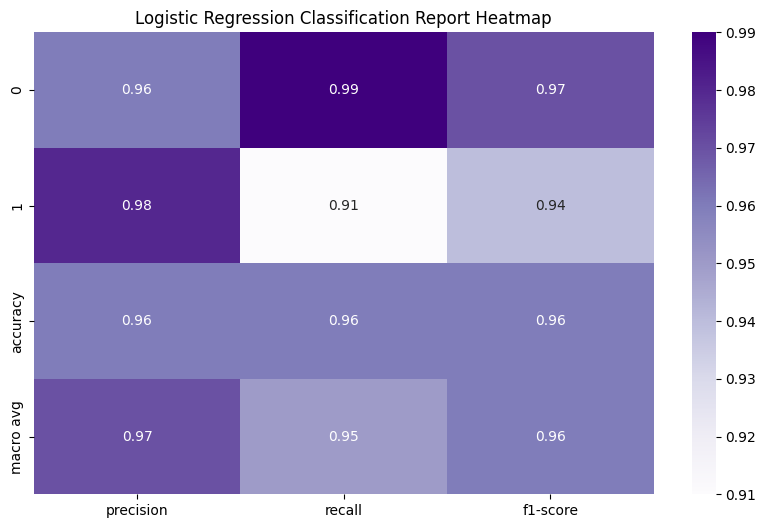

In [8]:
# Plotting the Classification Report, heatmap for better visibility
plt.figure(figsize=(10, 6))
sns.heatmap(data=logistic_classification.iloc[:-1, :].drop(columns='support'), annot=True, cmap='Purples')
plt.title('Logistic Regression Classification Report Heatmap')
plt.show

# 3. SVM

The test function has been set and trained on the 80% of the data, that set aside for training the algorithm 

In [9]:
#implement the test function for SVM k-fold cross-validation
def svm_test():
    # Train the model
    model = svm.SVC(probability=True)
    # define the hyperparameter values for the exhaustive search
    svm_parameters = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto',0.01, 0.001, 0.1, 1, 10]
    }
    # Define the K-Fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # Setup GridSearchCV
    svm_gridsearch = GridSearchCV(model, svm_parameters, cv=kfold, scoring='f1')
    svm_gridsearch.fit(X_train, y_train)
    # Best model after grid search
    print("the best hyperparameters found are:", svm_gridsearch.best_params_)
#Execute the test function to print the best hyperparameters for the f1 Scoring discriminator
svm_test()

the best hyperparameters found are: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


We now set the main model based on the hyperparameters that were tuned from the K-fold cross validation

In [ ]:
def svm_model():
    # Name the model for the future database
    method = 'svm'
    # Train the model with the best hyperparameter values, produced above
    Svm = svm.SVC(probability=True, C=1, gamma='scale', kernel='rbf', C=1)
    # Fit the model on the training data
    Svm.fit(X_train, y_train)
    # Make predictions on the testing set
    svm_y_predict = Svm.predict(X_test)
    accuracy = accuracy_score(y_test, svm_y_predict)
    # Calculate the Evaluation metrics
    accuracy = accuracy_score(y_test, svm_y_predict)
    precision = precision_score(y_test, svm_y_predict)
    recall = recall_score(y_test, svm_y_predict)
    f1 = f1_score(y_test, svm_y_predict)
    # SVM AUC Score prediction
    svm_predictions_proba = Svm.predict_proba(X_test)[::, 1]
    auc_score = roc_auc_score(y_test, svm_predictions_proba)
    # Global Variables for Confusion matrix
    global svm_conf_matrix
    svm_conf_matrix = confusion_matrix(y_test, svm_y_predict)
    # Global Variables for the Classification Report
    global svm_classification
    report = classification_report(y_test, svm_y_predict, output_dict=True)
    # Convert the report to a DataFrame
    svm_classification = pd.DataFrame(report).transpose()
    # round to 2 decimal places
    svm_classification = svm_classification.round(2)
    # return the elvaluation metrics to be stored in the database
    return method, accuracy, precision, recall, auc_score, f1

svm_model()

('svm',
 0.9642857142857143,
 0.9361702127659575,
 0.9565217391304348,
 0.9960684551341351,
 0.946236559139785)

Show the Classification Report

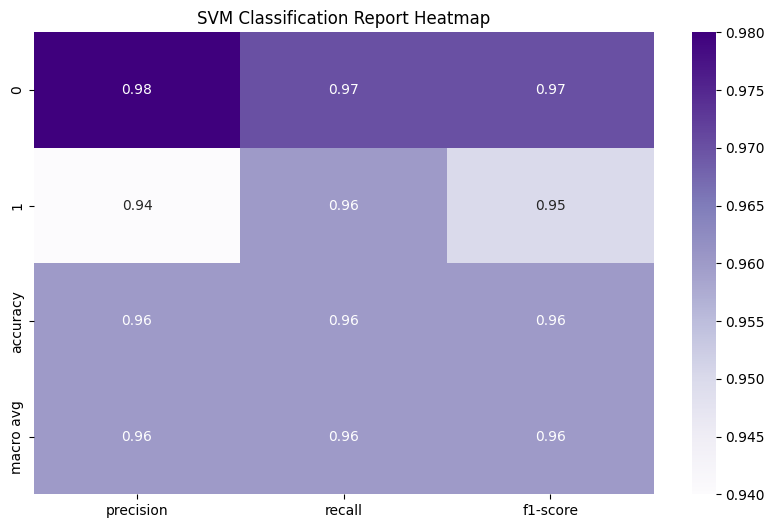

In [11]:
# Plotting the Classification Report, heatmap for better visibility
plt.figure(figsize=(10, 6))
sns.heatmap(data=svm_classification.iloc[:-1, :].drop(columns='support'), annot=True, cmap='Purples')
plt.title('SVM Classification Report Heatmap')
plt.show()

# 4. Random Forest

We now set the test function to find the best hyperparameters

In [12]:
#implement the test function for random forest k-fold cross-validation
def rfc_test():
    # Train the model
    model = RandomForestClassifier(random_state=42)
    # define the hyperparameter values for the exhaustive search
    rfc_parameters = {
        'n_estimators': [25, 50, 100, 150], 
        'max_features': ['sqrt', 'log2', None], 
        'max_depth': [5, 10, 15, 20], 
        'max_leaf_nodes': [3, 6, 9]
    }
    # define the K-Fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # Setup GridSearchCV
    rf_gridsearch = GridSearchCV(model, rfc_parameters, cv=kfold, scoring='f1')
    rf_gridsearch.fit(X_train, y_train)
    # Best model after grid search
    print("the best hyperparameters found are:", rf_gridsearch.best_params_)

rfc_test()

the best hyperparameters found are: {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 25}


After finding the best hyperparameters, we now tune our main model

In [13]:
def rfc_model():
    # Name the model for the future database
    method = 'Random Forest'
    # Train the model with the best hyperparameter values, produced above
    model = RandomForestClassifier(random_state=42, max_depth=10, max_features='sqrt',max_leaf_nodes=9, n_estimators=25)
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the testing set
    rfc_y_predict = model.predict(X_test)
    # Calculate the Evaluation metrics
    accuracy = accuracy_score(y_test, rfc_y_predict)
    precision = precision_score(y_test, rfc_y_predict)
    recall = recall_score(y_test, rfc_y_predict)
    f1 = f1_score(y_test, rfc_y_predict)
    # RFC AUC Score prediction
    rfc_predictions_proba = model.predict_proba(X_test)[::, 1]
    auc_score = roc_auc_score(y_test, rfc_predictions_proba)
    # Global Variables for Confusion matrix
    global rfc_conf_matrix
    rfc_conf_matrix = confusion_matrix(y_test, rfc_y_predict)
    # Global Variables for the Classification Report
    global rfc_classification
    report = classification_report(y_test, rfc_y_predict, output_dict=True)
    # Convert the report to a DataFrame
    rfc_classification = pd.DataFrame(report).transpose()
    # round to 2 decimal places
    rfc_classification = rfc_classification.round(2)
    # return the elvaluation metrics to be stored in the database
    return method, accuracy, precision, recall, auc_score, f1

rfc_model()

('Random Forest',
 0.9714285714285714,
 0.9565217391304348,
 0.9565217391304348,
 0.9937557816836263,
 0.9565217391304348)

Plotting the Classification Report

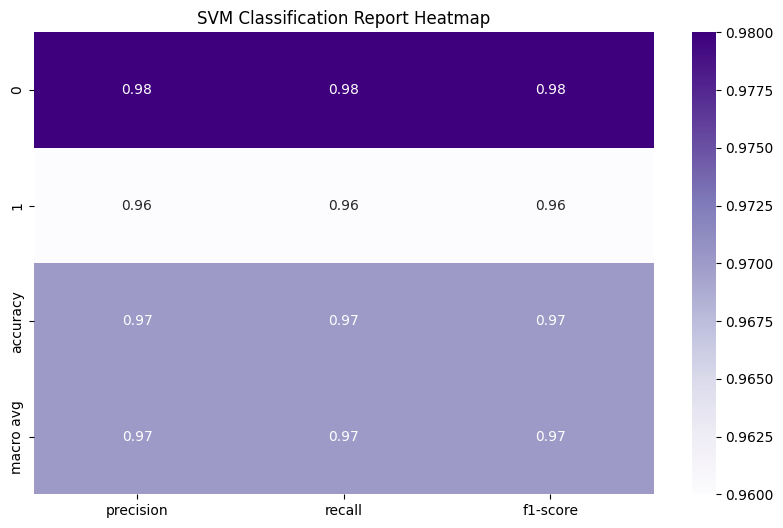

In [14]:
# Plotting the Classification Report, heatmap for better visibility
plt.figure(figsize=(10, 6))
sns.heatmap(data= rfc_classification.iloc[:-1, :].drop(columns='support'), annot=True, cmap='Purples')
plt.title('SVM Classification Report Heatmap')
plt.show()

# 5. Storing the data

Import the relevant module, Pandas. Create the data frame with the relevant Columns

In [15]:
# create column names and setup the dataframe to store the final model data
columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1_Score']
final_results_dataframe = pd.DataFrame(columns=columns)

Create a dataframe to store the results for easy access to any of the data from all 3 Classification Models

In [16]:
# Create a function to store the data from the final models
def store_results(classifmethod):
    # set up the information, to be recieved from the model
    method, accuracy, precision, recall, auc_score, f1= classifmethod()
    new_row_df = pd.DataFrame([{ 
        'Method': method,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc_score,
        'F1_Score': f1,
    }])
    # Turn it into a global dataframe, so information can be used anywhere after this point
    global final_results_dataframe
    # Check if the method's results are already in the DataFrame, so it's not stored multiple times
    if method in final_results_dataframe['Method'].values:
        print(f"Results for the {method} method are already stored.")
        return
    # Concat the results to the dataframe
    final_results_dataframe = pd.concat([final_results_dataframe, new_row_df], ignore_index=True)

# Call all three classfication models, to store it's data in the dataframe
store_results(logistic_reg)
store_results(svm_model)
store_results(rfc_model)

/var/folders/5j/g2cw4ks56ljgxtxq3xs2947r0000gn/T/ipykernel_8080/796722156.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_results_dataframe = pd.concat([final_results_dataframe, new_row_df], ignore_index=True)


# 6. Viewing the data

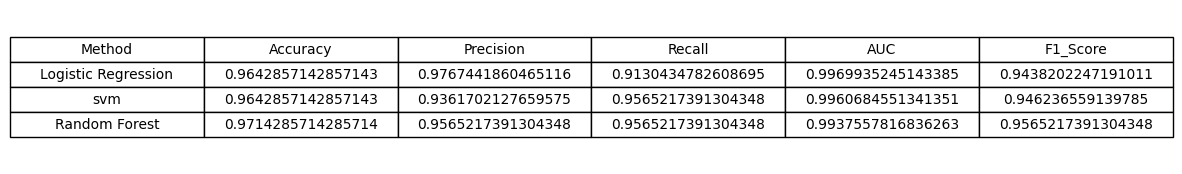

In [17]:
# Create a figure and axis to hold the table
fig, ax = plt.subplots(figsize=(10, 2))
# Turn off the axis lines, making the tables more visually pleasing
ax.axis('off')
# Create the table and add it to the axis
the_table = ax.table(cellText=final_results_dataframe.values, colLabels=final_results_dataframe.columns, cellLoc='center', loc='center')
# Increase the size of the table to improve readability
the_table.scale(1.5, 1.5)
# Show the table
plt.show()


View the Logistic Regression Confusion Matrix

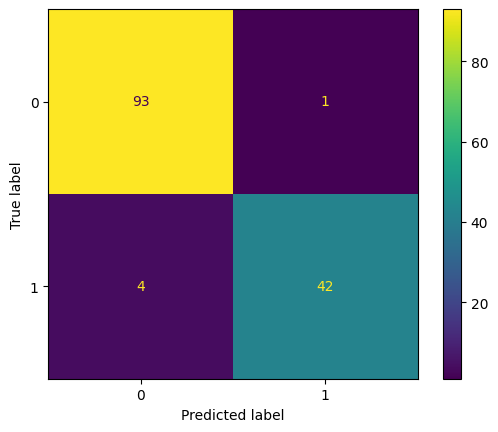

In [18]:
#View the Logistic Regression confusion Matrix
cm_display = ConfusionMatrixDisplay(logistic_conf_matrix).plot()

View the SVM confusion Matrix

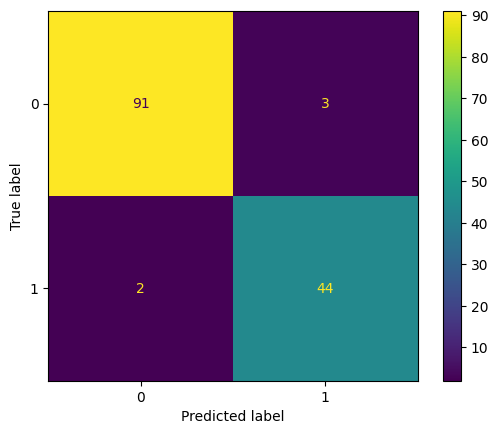

In [19]:
#View the SVM confusion Matrix
cm_display = ConfusionMatrixDisplay(svm_conf_matrix).plot()

View the Random Forest confusion Matrix

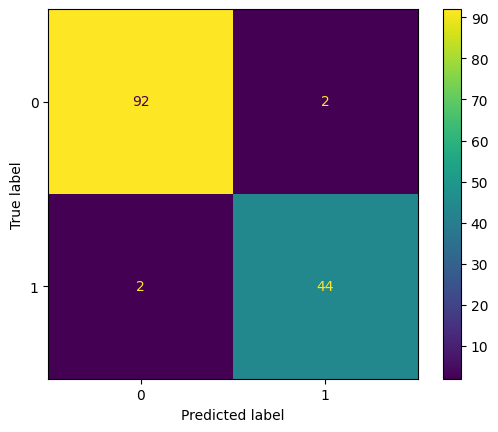

In [20]:
#View the Random Forest confusion Matrix
cm_display = ConfusionMatrixDisplay(rfc_conf_matrix).plot()